### №1

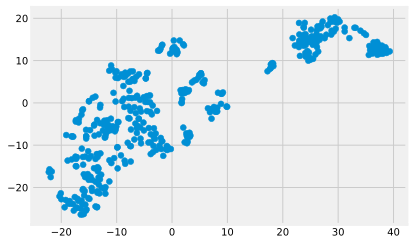

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y =  pd.DataFrame(boston.target, columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler(with_mean=False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()


### №2

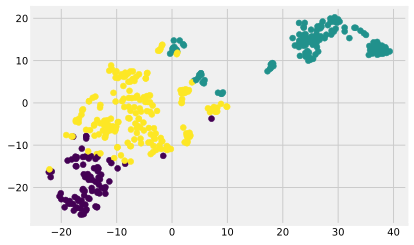

Mean price
Claster 0: 27.788372093023252 
Claster 1: 16.165354330708666
Claster 2: 24.958115183246072 

Mean CRIM
Claster 0: 0.07356558139534886 
Claster 1: 10.797028425196853
Claster 2: 0.42166020942408367


In [42]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

print("Mean price")
print(f"Claster 0: {y_train.loc[labels_train == 0, 'price'].mean()} ")
print(f"Claster 1: {y_train.loc[labels_train == 1, 'price'].mean()}")
print(f"Claster 2: {y_train.loc[labels_train == 2, 'price'].mean()} \n")
print("Mean CRIM")
print(f"Claster 0: {X_train.loc[labels_train == 0, 'CRIM'].mean()} ")
print(f"Claster 1: {X_train.loc[labels_train == 1, 'CRIM'].mean()}")
print(f"Claster 2: {X_train.loc[labels_train == 2, 'CRIM'].mean()}")

### №3

In [45]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train = kmeans.fit_predict(X_test_scaled)

print("Mean price")
print(f"Claster 0: {y_test.loc[labels_train == 0, 'price'].mean()} ")
print(f"Claster 1: {y_test.loc[labels_train == 1, 'price'].mean()}")
print(f"Claster 2: {y_test.loc[labels_train == 2, 'price'].mean()} \n")
print("Mean CRIM")
print(f"Claster 0: {X_test.loc[labels_train == 0, 'CRIM'].mean()} ")
print(f"Claster 1: {X_test.loc[labels_train == 1, 'CRIM'].mean()}")
print(f"Claster 2: {X_test.loc[labels_train == 2, 'CRIM'].mean()}")

Mean price
Claster 0: 33.871428571428574 
Claster 1: 21.552830188679245
Claster 2: 16.437142857142856 

Mean CRIM
Claster 0: 0.08618571428571427 
Claster 1: 0.25200716981132076
Claster 2: 10.165531142857143
